# Run GLS Analysis

No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No o

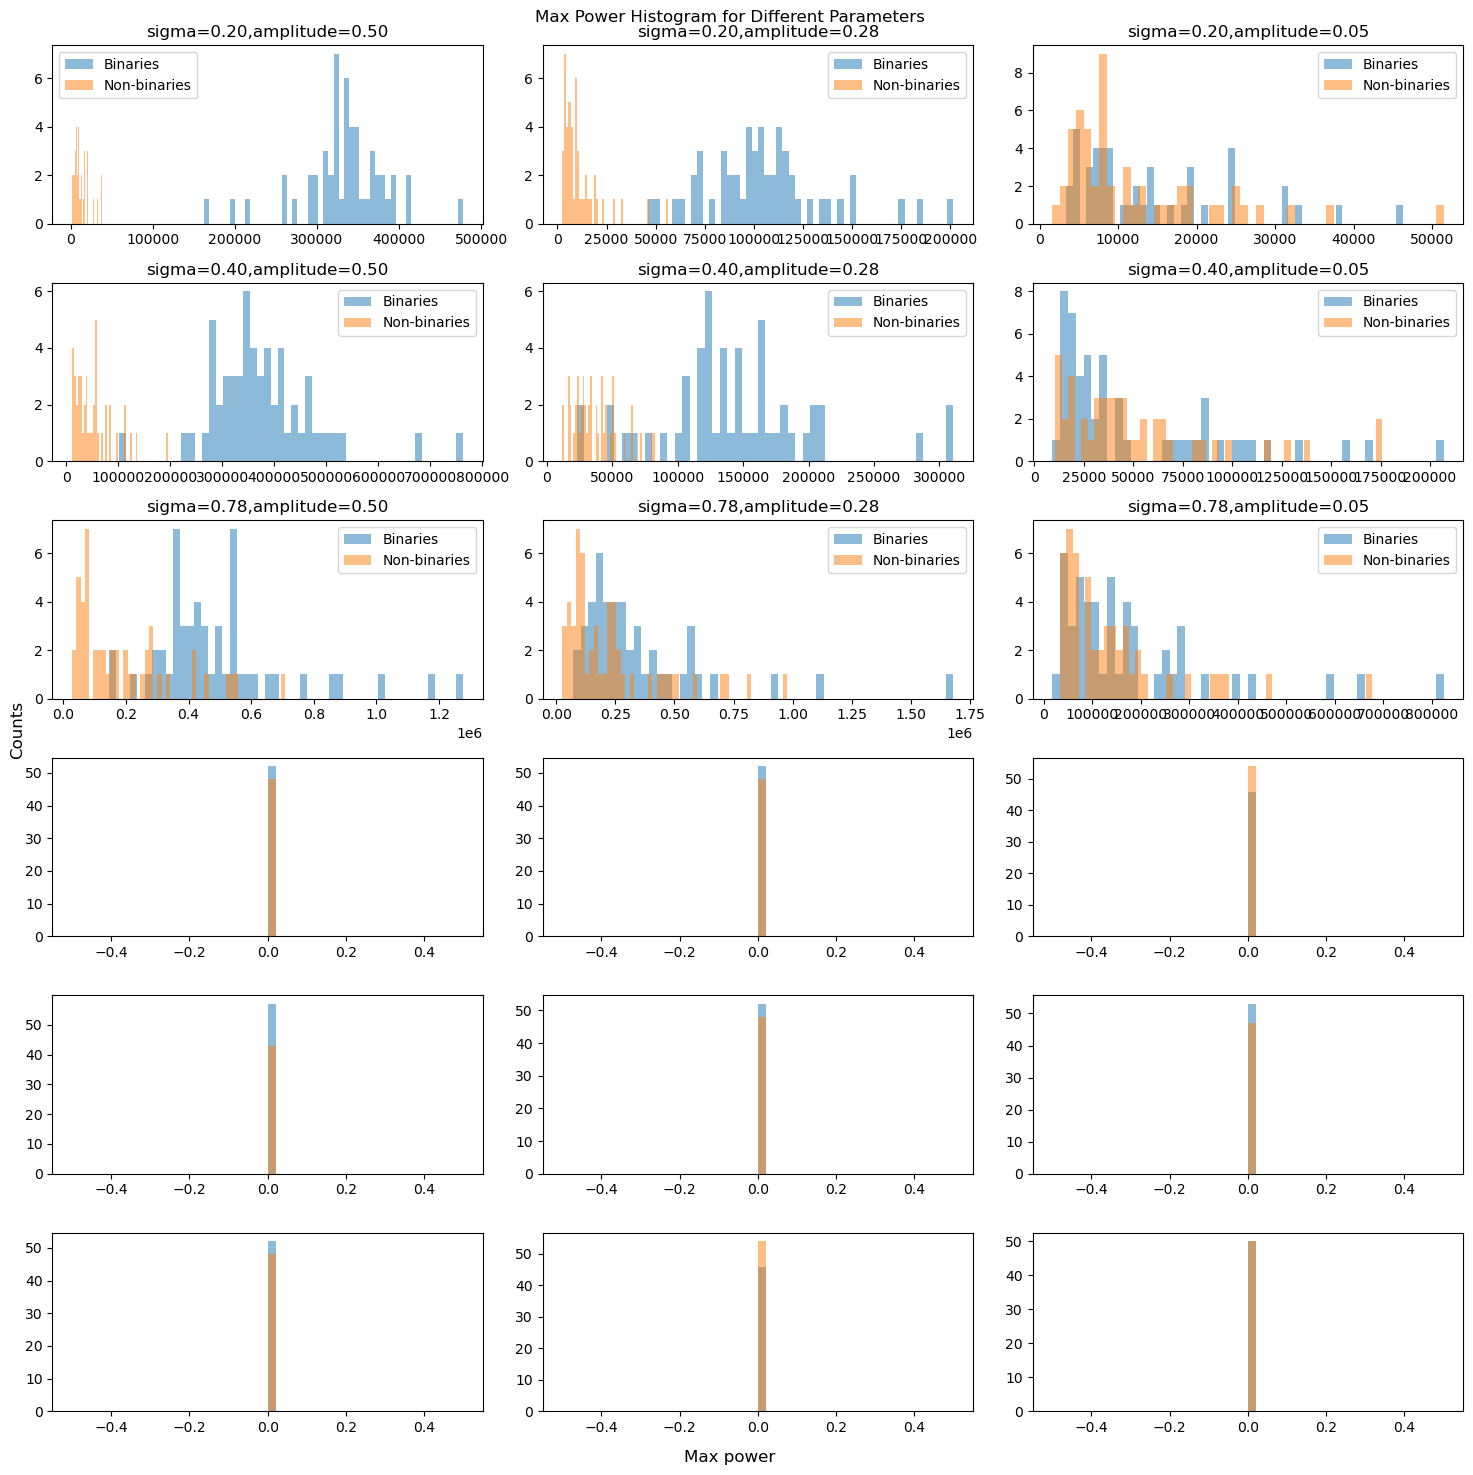

In [20]:
import matplotlib.pyplot as plt
import glsanalysisrunner as glsar
import numpy as np
import pandas as pd

params = glsar.GlsAnalysisParams()
sigmas = [np.exp(-1.6), np.exp((-1.6-0.25)/2), np.exp(-0.25)]
amplitudes = [0.5, 0.55/2, 0.05]
fig, axs = plt.subplots(2*len(sigmas),len(amplitudes))
fig.suptitle('Max Power Histogram for Different Parameters')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        params.sigma = sigmas[i]
        params.amplitude = amplitudes[j]
        params.package_to_use = 'pyastronomy' #  pyastronomy scipy astroPy
        #params.phase = 2
        results = glsar.GlsAnalysisRunner().run(params=params, num_iterations=100)
        df = pd.DataFrame(results, columns=["is_binary", "period", 'detected_period', 'period_error', 'max_power', 'max_fap_adj', 'num_peaks'])
        
        axs[i, j].set_title(params)
        axs[i, j].hist(df.loc[df["is_binary"] == True, "max_power"], bins=50, label='Binaries', alpha = 0.5)
        axs[i, j].hist(df.loc[df["is_binary"] == False, "max_power"], bins=50, label='Non-binaries', alpha = 0.5)
        axs[i+3, j].hist(df.loc[df["is_binary"] == True, "max_fap_adj"], bins=50, label='Binaries', alpha = 0.5)
        axs[i+3, j].hist(df.loc[df["is_binary"] == False, "max_fap_adj"], bins=50, label='Non-binaries', alpha = 0.5)
        
        axs[i, j].legend()

#axs[0, 0].legend(loc="upper right")
fig.supxlabel('Max power')
fig.supylabel('Counts')

fig.tight_layout()
fig.savefig('output/max_power_analysis.png')
plt.show()


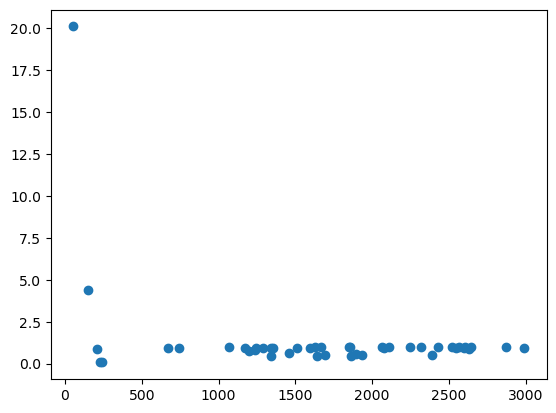

In [14]:
plt.scatter(df.loc[df["is_binary"] == True, "period"], df.loc[df["is_binary"] == True, "period_error"])
plt.show()

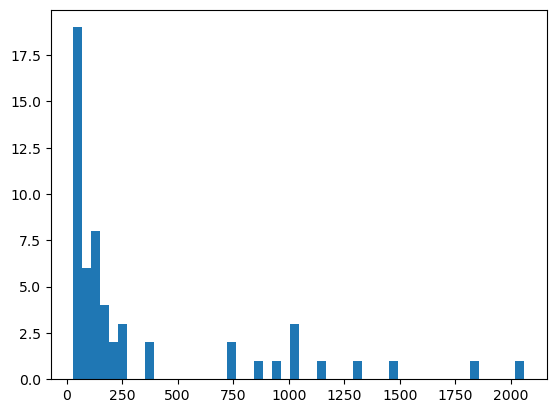

In [15]:
plt.hist(df.loc[df["is_binary"] == False, "detected_period"], bins=50)
plt.show()